In [16]:
#2022/08/01

In [17]:
import pandas as pd
import numpy as np

In [18]:
df_SPX = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)

# Use the dtypes attribute to check what types are in each column
# the word 'object' is used to denote a string
print(df_SPX.dtypes)

df_SPX.head()

Price       object
Open        object
High        object
Low         object
Change %    object
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,"2,673.61","2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,"2,687.54","2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,"2,682.62","2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,"2,680.50","2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,"2,683.34","2,684.22","2,685.35","2,678.13",-0.05%


In [19]:
for i in ['Price','Open','High','Low','Change %']:
    if i == 'Change %':
        df_SPX[i] = pd.to_numeric(df_SPX[i].str.replace('%',''))
    else:
        df_SPX[i] = pd.to_numeric(df_SPX[i].str.replace(',',''))
print(df_SPX.dtypes)
df_SPX.head()

Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object


,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,2689.15,2692.12,2673.61,-0.52
2017-12-28,2687.54,2686.10,2687.66,2682.69,0.18
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05


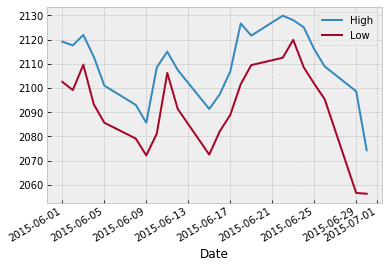

In [63]:
cols = ['High', 'Low']
df_SPX[cols]['Jun 2015'].plot()


In [36]:
df_SPX.groupby('Price').min()

,Open,High,Low,Change %
Price,,,,
676.53,680.76,695.27,672.88,-1.00
682.55,708.27,708.27,677.93,-4.25
683.38,684.04,699.09,666.79,0.12
696.33,704.44,711.67,692.30,-0.64
700.82,729.57,729.57,699.70,-4.66
...,...,...,...,...
2682.62,2682.10,2685.64,2678.91,0.08
2683.34,2684.22,2685.35,2678.13,-0.05
2684.57,2683.02,2692.64,2682.40,0.20


In [37]:
df_SPX.groupby('Open').min()

,Price,High,Low,Change %
Open,,,,
679.28,719.60,719.60,679.28,6.37
680.76,676.53,695.27,672.88,-1.00
684.04,683.38,699.09,666.79,0.12
698.60,712.87,724.12,698.60,2.38
704.44,696.33,711.67,692.30,-0.64
...,...,...,...,...
2685.92,2690.16,2694.97,2685.92,0.54
2686.10,2687.54,2687.66,2682.69,0.18
2688.18,2679.25,2691.01,2676.11,-0.08


In [38]:
df_SPX.groupby('High').min()

,Price,Open,Low,Change %
High,,,,
695.27,676.53,680.76,672.88,-1.00
699.09,683.38,684.04,666.79,0.12
708.27,682.55,708.27,677.93,-4.25
711.67,696.33,704.44,692.30,-0.64
719.60,719.60,679.28,679.28,6.37
...,...,...,...,...
2691.01,2679.25,2688.18,2676.11,-0.08
2692.12,2673.61,2689.15,2673.61,-0.52
2692.64,2684.57,2683.02,2682.40,0.20


In [39]:
df_SPX.groupby('Low').min()

,Price,Open,High,Change %
Low,,,,
666.79,683.38,684.04,699.09,0.12
672.88,676.53,680.76,695.27,-1.00
677.93,682.55,708.27,708.27,-4.25
679.28,719.60,679.28,719.60,6.37
692.30,696.33,704.44,711.67,-0.64
...,...,...,...,...
2678.91,2682.62,2682.10,2685.64,0.08
2680.74,2681.47,2692.71,2694.44,-0.32
2682.40,2684.57,2683.02,2692.64,0.20


In [40]:
df_SPX.groupby('Change %').min()

,Price,Open,High,Low
Change %,,,,
-9.03,907.84,994.60,994.60,903.99
-8.93,816.21,888.61,888.61,815.69
-8.81,1106.42,1209.07,1209.07,1106.42
-7.62,909.92,988.42,1005.25,909.19
-6.71,752.44,805.87,820.52,747.78
...,...,...,...,...
6.47,851.81,801.20,865.60,801.20
6.92,911.29,853.13,913.01,818.69
7.08,822.92,772.31,823.37,772.31


In [47]:
funcs = ['min','max','median']
df_SPX.groupby('Price').agg(funcs)

Open                       High                        Low  \
             min      max   median      min      max   median      min   
Price                                                                    
676.53    680.76   680.76   680.76   695.27   695.27   695.27   672.88   
682.55    708.27   708.27   708.27   708.27   708.27   708.27   677.93   
683.38    684.04   684.04   684.04   699.09   699.09   699.09   666.79   
696.33    704.44   704.44   704.44   711.67   711.67   711.67   692.30   
700.82    729.57   729.57   729.57   729.57   729.57   729.57   699.70   
...          ...      ...      ...      ...      ...      ...      ...   
2682.62  2682.10  2682.10  2682.10  2685.64  2685.64  2685.64  2678.91   
2683.34  2684.22  2684.22  2684.22  2685.35  2685.35  2685.35  2678.13   
2684.57  2683.02  2683.02  2683.02  2692.64  2692.64  2692.64  2682.40   
2687.54  2686.10  2686.10  2686.10  2687.66  2687.66  2687.66  2682.69   
2690.16  2685.92  2685.92  2685.92  2694.97  2694.97  2694.97  2685.92   

                          Change %               
             max   median      min   max median  
Price                                            
676.53    672.88   672.88    -1.00 -1.00  -1.00  
682.55    677.93   677.93    -4.25 -4.25  -4.25  
683.38    666.79   666.79     0.12  0.12   0.12  
696.33    692.30   692.30    -0.64 -0.64  -0.64  
700.82    699.70   699.70    -4.66 -4.66  -4.66  
...          ...      ...      ...   ...    ...  
2682.62  2678.91  2678.91     0.08  0.08   0.08  
2683.34  2678.13  2678.13    -0.05 -0.05  -0.05  
2684.57  2682.40  2682.40     0.20  0.20   0.20  
2687.54  2682.69  2682.69     0.18  0.18   0.18  
2690.16  2685.92  2685.92     0.54  0.54   0.54  

[2977 rows x 12 columns]